In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NL_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,NaN
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,NaN,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	35
float64		column 2	55
float64		column 3	50
float64		column 4	60
float64		column 5	55
float64		column 6	41
float64		column 7	35
float64		column 8	51
float64		column 9	31
float64		column 10	60
float64		column 11	55
float64		column 12	31
float64		column 13	80
float64		column 14	45
float64		column 15	26
float64		column 16	55
float64		column 17	30
float64		column 18	40
float64		column 19	41
float64		column 20	30
float64		column 21	45
float64		column 22	55
float64		column 23	46
float64		column 24	25
float64		column 25	61
float64		column 26	25
float64		column 27	21
float64		column 28	41
float64		column 29	20
float64		column 30	10
float64		column 31	35
float64		column 32	45
float64		column 33	55
float64		column 34	25
float64		column 35	30
float64		column 36	40
float64		column 37	36
float64		column 38	45
float64		column 39	35
float64		column 40	40
float64		column 41	45
float64		column 42	30
float64		column 43	50
float64		column 44	20
flo

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4562.000000,4542.000000,4547.000000,4537.000000,4542.000000,4556.000000,4562.000000,4546.000000,4566.000000,4537.000000,...,4557.000000,4582.000000,4572.000000,4547.000000,4567.000000,4566.000000,4572.000000,4562.000000,4552.000000,4552.000000
mean,0.104099,0.213056,0.276611,0.066348,0.309469,0.095643,0.113130,0.104443,0.089347,0.237503,...,0.031385,0.037389,0.138735,0.016918,0.269279,0.075686,0.043685,5.207321,51.781634,283.576889
std,0.305330,1.297997,0.495369,1.404937,0.663347,0.274089,0.390657,0.398580,0.278070,0.639894,...,0.284356,0.235908,0.270106,0.109802,0.817858,0.246030,0.429264,31.863492,195.127648,607.974408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588500,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000
75%,0.000000,0.000000,0.410000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.187250,0.000000,0.315000,0.052750,0.000000,3.704750,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

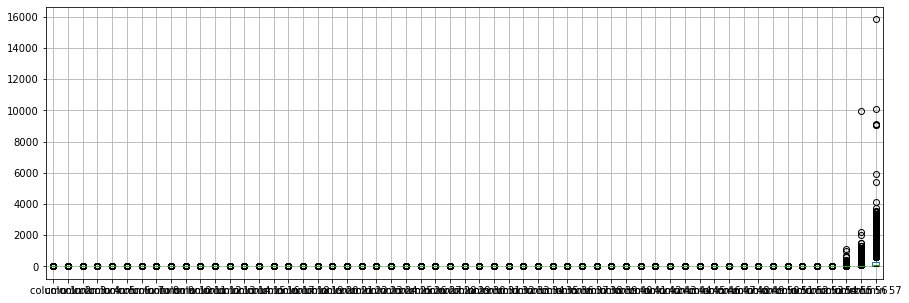

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.104099
column 2       0.213056
column 3       0.276611
column 4       0.066348
column 5       0.309469
column 6       0.095643
column 7       0.113130
column 8       0.104443
column 9       0.089347
column 10      0.237503
column 11      0.058912
column 12      0.540377
column 13      0.092150
column 14      0.058583
column 15      0.049175
column 16      0.246744
column 17      0.141828
column 18      0.183902
column 19      1.656811
column 20      0.086175
column 21      0.808875
column 22      0.119247
column 23      0.101953
column 24      0.092185
column 25      0.546100
column 26      0.264479
column 27      0.765774
column 28      0.124355
column 29      0.098735
column 30      0.103078
column 31      0.064702
column 32      0.046887
column 33      0.092589
column 34      0.048139
column 35      0.105868
column 36      0.096770
column 37      0.136106
column 38      0.013322
column 39      0.078591
column 40      0.065247
column 41      0.043166
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.017548,0.065725,0.013304,0.025564,0.054523,0.008668,-0.004834,0.104594,0.040440,...,-0.018407,-0.027606,-0.021331,-0.032813,0.057345,0.118705,-0.011104,0.044870,0.061248,0.088136
column 2,-0.017548,1.000000,-0.035589,-0.006935,-0.023258,-0.025733,0.004447,-0.016920,-0.004481,0.033838,...,-0.015325,-0.007625,-0.049462,-0.018197,-0.014699,-0.008847,0.001625,0.002359,-0.000411,-0.022289
column 3,0.065725,-0.035589,1.000000,-0.020445,0.082063,0.087284,0.037671,0.013028,0.089411,0.029344,...,-0.025854,-0.031495,-0.021098,-0.035565,0.100807,0.087437,-0.002867,0.095949,0.103066,0.071074
column 4,0.013304,-0.006935,-0.020445,1.000000,0.004577,-0.009995,0.020429,0.010502,-0.002389,-0.004784,...,-0.001907,-0.000436,-0.012493,-0.007127,-0.003205,0.010935,-0.000295,0.005198,0.022312,0.021404
column 5,0.025564,-0.023258,0.082063,0.004577,1.000000,0.052699,0.150194,0.031520,0.020569,0.043425,...,-0.031815,-0.032712,-0.051426,-0.026437,0.022903,0.042403,0.002561,0.052819,0.050583,0.005400
column 6,0.054523,-0.025733,0.087284,-0.009995,0.052699,1.000000,0.062963,0.080897,0.112279,0.013752,...,-0.031113,-0.023294,-0.008878,-0.014452,0.065387,0.109611,0.019670,-0.010586,0.083741,0.081784
column 7,0.008668,0.004447,0.037671,0.020429,0.150194,0.062963,1.000000,0.046348,0.052914,0.059883,...,-0.030921,-0.033794,-0.052348,-0.027345,0.053477,0.070866,0.045439,0.041616,0.063049,-0.006025
column 8,-0.004834,-0.016920,0.013028,0.010502,0.031520,0.080897,0.046348,1.000000,0.105088,0.086303,...,-0.020914,-0.026943,-0.031229,-0.019047,0.029815,0.059870,-0.009054,0.011589,0.037673,0.039230
column 9,0.104594,-0.004481,0.089411,-0.002389,0.020569,0.112279,0.052914,0.105088,1.000000,0.130852,...,-0.024999,-0.013530,-0.029737,0.014243,0.043730,0.144585,-0.002566,0.112203,0.180575,0.246334
column 10,0.040440,0.033838,0.029344,-0.004784,0.043425,0.013752,0.059883,0.086303,0.130852,1.000000,...,-0.015740,0.012978,0.001002,0.006731,0.035026,0.077753,0.046095,0.074175,0.099940,0.086246


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+24,17+24+24,17+24+24+24,17+24+24,17+24,17], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 678.5544273562548
Epoch: 1 , loss: 677.3063006251531
Epoch: 2 , loss: 680.9891481034016
Epoch: 3 , loss: 675.5620289978665
Epoch: 4 , loss: 679.2628629996801
Epoch: 5 , loss: 667.5800686613608
Epoch: 6 , loss: 675.4046551641271
Epoch: 7 , loss: 676.3591369203574
Epoch: 8 , loss: 673.306276753389
Epoch: 9 , loss: 672.5327694723416
Epoch: 10 , loss: 662.3203473772321
Epoch: 11 , loss: 648.9555698620733
Epoch: 12 , loss: 563.1213035982245
Epoch: 13 , loss: 533.9084567824307
Epoch: 14 , loss: 511.60397096959554
Epoch: 15 , loss: 513.2296045283407
Epoch: 16 , loss: 512.6105871433165
Epoch: 17 , loss: 485.13789428817273
Epoch: 18 , loss: 475.75096608869706
Epoch: 19 , loss: 472.71170304461225
Epoch: 20 , loss: 471.5302406337618
Epoch: 21 , loss: 490.00445950072816
Epoch: 22 , loss: 496.552486087387
Epoch: 23 , loss: 498.1839873416914
Epoch: 24 , loss: 482.90076494383067
Epoch: 25 , loss: 481.33162168177165
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-188.617386
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.042966,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4593,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4594,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4595,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

3372.485946486731

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.07106155957043064

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.000000,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.000000
1,0.21,0.28,0.50,0.000000,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.000000
2,0.00,0.00,0.00,0.000000,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,2.382614
3,0.00,0.00,0.00,0.000000,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.000000
4,0.00,0.00,0.00,0.042966,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.000000
4593,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.000000
4594,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.000000
4595,0.17,0.00,0.68,0.000000,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.000000


In [21]:
imputations[-1].to_excel("Spam_NL_1(imp).xlsx", index=False, header=False)